In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [5]:
# Đọc dữ liệu
file_path = "data/10kmau2012.csv" 
df = pd.read_csv(file_path)

# Hiển thị thông tin cơ bản
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9392 entries, 0 to 9391
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ttnt             9392 non-null   int64  
 1   dantoc           9392 non-null   int64  
 2   tsnguoi          9392 non-null   int64  
 3   thunhap          9392 non-null   float64
 4   chitieu          9392 non-null   float64
 5   chichonangluong  9392 non-null   int64  
 6   chitiendien      9392 non-null   int64  
 7   dienticho        9392 non-null   int64  
 8   chatluongo       9392 non-null   int64  
 9   tiepcandienluoi  9392 non-null   int64  
 10  chitiendienbq    9392 non-null   float64
 11  thunhapbq        9392 non-null   float64
 12  chinangluongbq   9392 non-null   float64
 13  chitieubq        9392 non-null   float64
dtypes: float64(6), int64(8)
memory usage: 1.0 MB


,ttnt,dantoc,tsnguoi,thunhap,chitieu,chichonangluong,chitiendien,dienticho,chatluongo,tiepcandienluoi,chitiendienbq,thunhapbq,chinangluongbq,chitieubq
0,1,1,3,130800.0,39274.0,7835,6500,50,1,1,2166.666667,43600.0,2611.666667,13091.33333
1,1,1,5,404000.0,46160.0,19920,18000,70,3,1,3600.000000,80800.0,3984.000000,9232.00000
2,1,1,5,112600.0,68233.0,20910,18500,100,3,1,3700.000000,22520.0,4182.000000,13646.60000
3,1,1,3,168000.0,35490.0,9635,7200,170,3,1,2400.000000,56000.0,3211.666667,11830.00000
4,1,1,4,235900.0,58574.0,9335,6600,160,3,1,1650.000000,58975.0,2333.750000,14643.50000


In [7]:
missing_values = df.isnull().sum()
print("Số lượng giá trị thiếu trong từng cột:\n", missing_values)

Số lượng giá trị thiếu trong từng cột:
 ttnt               0
dantoc             0
tsnguoi            0
thunhap            0
chitieu            0
chichonangluong    0
chitiendien        0
dienticho          0
chatluongo         0
tiepcandienluoi    0
chitiendienbq      0
thunhapbq          0
chinangluongbq     0
chitieubq          0
dtype: int64


In [9]:
# Chọn các biến quan trọng để phân cụm
features = ['chichonangluong', 'chitiendien', 'tiepcandienluoi', 'chitiendienbq', 
            'chinangluongbq', 'thunhap', 'thunhapbq', 'tsnguoi', 'ttnt', 'dantoc', 'dienticho']

# Áp dụng Min-Max Scaling để chuẩn hóa dữ liệu
scaler = MinMaxScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df[features]), columns=features)

# Hiển thị dữ liệu đã chuẩn hóa
df_scaled.head()

,chichonangluong,chitiendien,tiepcandienluoi,chitiendienbq,chinangluongbq,thunhap,thunhapbq,tsnguoi,ttnt,dantoc,dienticho
0,0.209421,0.180556,1.0,0.115865,0.138173,0.023412,0.030545,0.142857,1.0,0.0,0.073090
1,0.532852,0.500000,1.0,0.192513,0.211057,0.072856,0.057496,0.285714,1.0,0.0,0.106312
2,0.559347,0.513889,1.0,0.197861,0.221573,0.020118,0.015272,0.285714,1.0,0.0,0.156146
3,0.257594,0.200000,1.0,0.128342,0.170039,0.030144,0.039528,0.142857,1.0,0.0,0.272425
4,0.249565,0.183333,1.0,0.088235,0.123413,0.042433,0.041684,0.214286,1.0,0.0,0.255814


In [11]:
pca = PCA(n_components=0.95)  
df_pca = pca.fit_transform(df_scaled)

num_components = df_pca.shape[1]
print(f"Số thành phần PCA giữ lại: {num_components}")

Số thành phần PCA giữ lại: 4


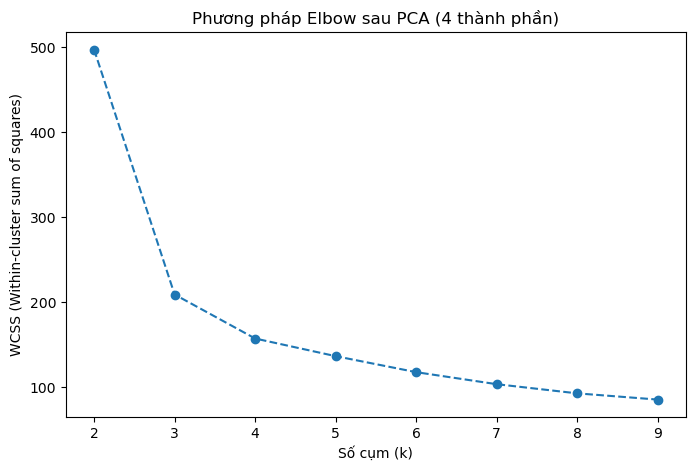

In [13]:
wcss_pca = []
K_range = range(2, 10)

for k in K_range:
    kmeans_pca = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans_pca.fit(df_pca)
    wcss_pca.append(kmeans_pca.inertia_)

plt.figure(figsize=(8,5))
plt.plot(K_range, wcss_pca, marker='o', linestyle='--')
plt.xlabel("Số cụm (k)")
plt.ylabel("WCSS (Within-cluster sum of squares)")
plt.title(f"Phương pháp Elbow sau PCA ({num_components} thành phần)")
plt.show()

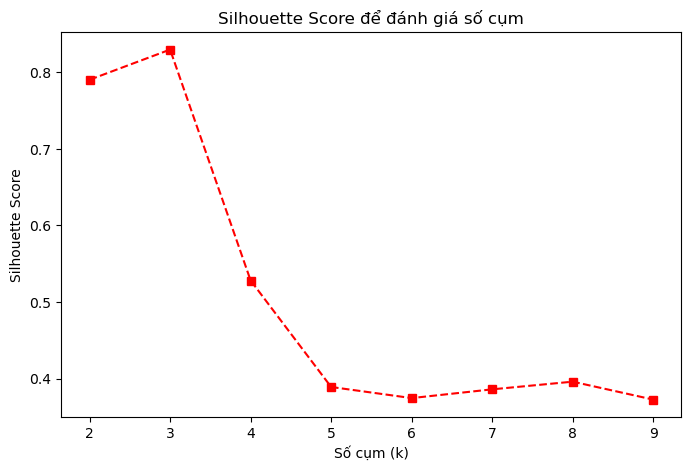

In [14]:
silhouette_scores = []
for k in K_range:
    kmeans_pca = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels_pca = kmeans_pca.fit_predict(df_pca)
    silhouette_scores.append(silhouette_score(df_pca, labels_pca))

# Vẽ biểu đồ Silhouette Score để đánh giá số cụm
plt.figure(figsize=(8,5))
plt.plot(K_range, silhouette_scores, marker='s', linestyle='--', color='r')
plt.xlabel("Số cụm (k)")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Score để đánh giá số cụm")
plt.show()

In [15]:
# Chọn số cụm tối ưu từ Elbow Method và Silhouette Score
optimal_k_pca = 3
kmeans_final = KMeans(n_clusters=optimal_k_pca, random_state=42, n_init=10)
df_scaled["Cluster_PCA"] = kmeans_final.fit_predict(df_pca)

# Thống kê số lượng hộ gia đình trong từng cụm
print("Số lượng hộ gia đình trong từng cụm:")
print(df_scaled["Cluster_PCA"].value_counts())

Số lượng hộ gia đình trong từng cụm:
Cluster_PCA
0    6397
1    2693
2     302
Name: count, dtype: int64


In [16]:
# Ghép lại với dữ liệu gốc để phân tích
df['Cluster_PCA'] = df_scaled["Cluster_PCA"]

# Trung bình các biến trong từng cụm
cluster_summary = df.groupby("Cluster_PCA")[features].mean()
print("Trung bình các biến theo từng cụm:")
print(cluster_summary)

Trung bình các biến theo từng cụm:
             chichonangluong  chitiendien  tiepcandienluoi  chitiendienbq  \
Cluster_PCA                                                                 
0                2109.727060  1392.353447         1.000000     440.347170   
1                3935.313034  2753.808392         0.999257     862.372496   
2                 997.685430   497.135762         0.000000     167.059397   

             chinangluongbq        thunhap     thunhapbq   tsnguoi      ttnt  \
Cluster_PCA                                                                    
0                632.651330   77411.093481  20843.707646  3.896514  0.000000   
1               1187.187734  132913.341626  36678.334682  3.831415  1.000000   
2                290.309985   42415.857616  10228.610720  4.605960  0.019868   

               dantoc  dienticho  
Cluster_PCA                       
0            2.395811  71.065968  
1            1.369848  84.959153  
2            7.923841  56.387417  


Số lượng hộ gia đình trong từng cụm:
Cluster_PCA
0    6397
1    2693
2     302
Name: count, dtype: int64


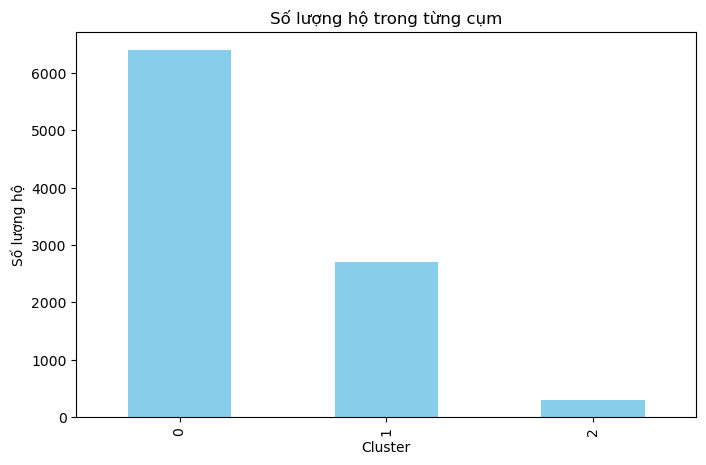

In [17]:
# Thống kê số lượng hộ gia đình trong từng cụm
cluster_counts = df['Cluster_PCA'].value_counts().sort_index()

print("Số lượng hộ gia đình trong từng cụm:")
print(cluster_counts)

# Vẽ biểu đồ số lượng hộ trong từng cụm
plt.figure(figsize=(8,5))
cluster_counts.plot(kind='bar', color='skyblue')
plt.xlabel("Cluster")
plt.ylabel("Số lượng hộ")
plt.title("Số lượng hộ trong từng cụm")
plt.show()

Đặc điểm kinh tế của từng cụm:
                   thunhap     thunhapbq       chitieu    chitieubq
Cluster_PCA                                                        
0             77411.093481  20843.707646  15229.614085  4722.122762
1            132913.341626  36678.334682  23612.950204  7161.541331
2             42415.857616  10228.610720  10068.883113  2786.148327


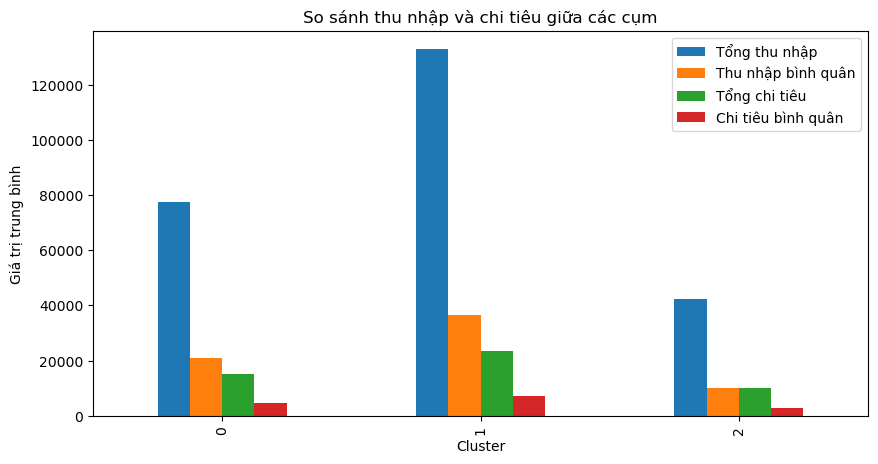

In [18]:
# Tính thu nhập và chi tiêu trung bình trong từng cụm
economic_summary = df.groupby("Cluster_PCA")[['thunhap', 'thunhapbq', 'chitieu', 'chitieubq']].mean()

print("Đặc điểm kinh tế của từng cụm:")
print(economic_summary)

# Vẽ biểu đồ so sánh thu nhập và chi tiêu trung bình giữa các cụm
economic_summary.plot(kind="bar", figsize=(10,5))
plt.xlabel("Cluster")
plt.ylabel("Giá trị trung bình")
plt.title("So sánh thu nhập và chi tiêu giữa các cụm")
plt.legend(["Tổng thu nhập", "Thu nhập bình quân", "Tổng chi tiêu", "Chi tiêu bình quân"])
plt.show()

Mức tiêu thụ năng lượng trong từng cụm:
             chichonangluong  chinangluongbq  chitiendien  chitiendienbq
Cluster_PCA                                                             
0                2109.727060      632.651330  1392.353447     440.347170
1                3935.313034     1187.187734  2753.808392     862.372496
2                 997.685430      290.309985   497.135762     167.059397


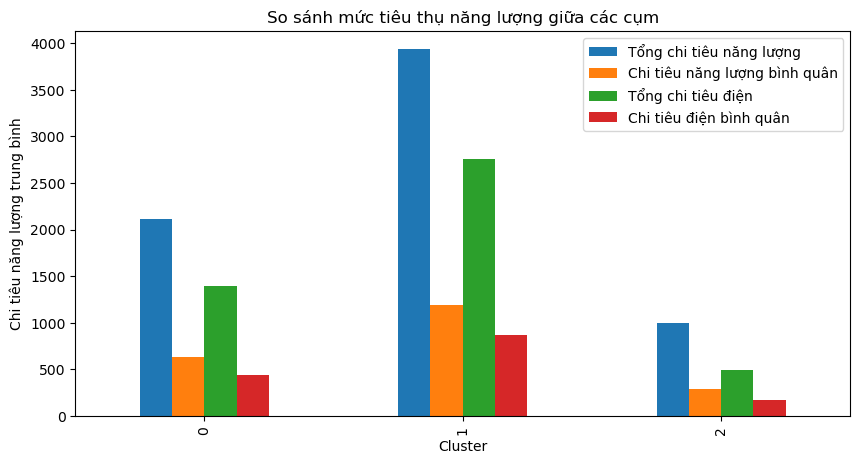

In [19]:
# Tính mức tiêu thụ năng lượng trung bình trong từng cụm
energy_summary = df.groupby("Cluster_PCA")[['chichonangluong', 'chinangluongbq', 'chitiendien', 'chitiendienbq']].mean()

print("Mức tiêu thụ năng lượng trong từng cụm:")
print(energy_summary)

# Vẽ biểu đồ so sánh tiêu thụ năng lượng giữa các cụm
energy_summary.plot(kind="bar", figsize=(10,5))
plt.xlabel("Cluster")
plt.ylabel("Chi tiêu năng lượng trung bình")
plt.title("So sánh mức tiêu thụ năng lượng giữa các cụm")
plt.legend(["Tổng chi tiêu năng lượng", "Chi tiêu năng lượng bình quân", "Tổng chi tiêu điện", "Chi tiêu điện bình quân"])
plt.show()

Tỷ lệ hộ có tiếp cận điện lưới trong từng cụm (%):
Cluster_PCA
0    100.000000
1     99.925733
2      0.000000
Name: tiepcandienluoi, dtype: float64


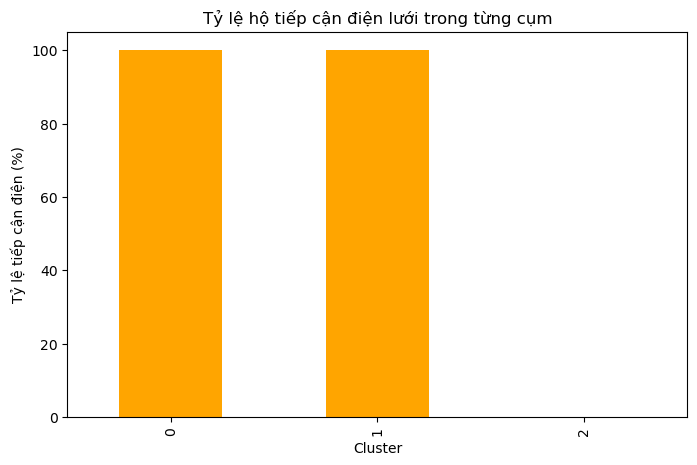

In [20]:
# Tính tỷ lệ hộ có tiếp cận điện lưới trong từng cụm
electricity_access = df.groupby("Cluster_PCA")["tiepcandienluoi"].mean() * 100

print("Tỷ lệ hộ có tiếp cận điện lưới trong từng cụm (%):")
print(electricity_access)

# Vẽ biểu đồ tỷ lệ tiếp cận điện lưới
plt.figure(figsize=(8,5))
electricity_access.plot(kind="bar", color="orange")
plt.xlabel("Cluster")
plt.ylabel("Tỷ lệ tiếp cận điện (%)")
plt.title("Tỷ lệ hộ tiếp cận điện lưới trong từng cụm")
plt.show()

Tỷ lệ hộ dân tộc thiểu số trong từng cụm (%):
Cluster_PCA
0    0.0
1    0.0
2    0.0
Name: dantoc, dtype: float64

Tỷ lệ hộ nông thôn trong từng cụm (%):
Cluster_PCA
0    100.000000
1      0.000000
2     98.013245
Name: ttnt, dtype: float64


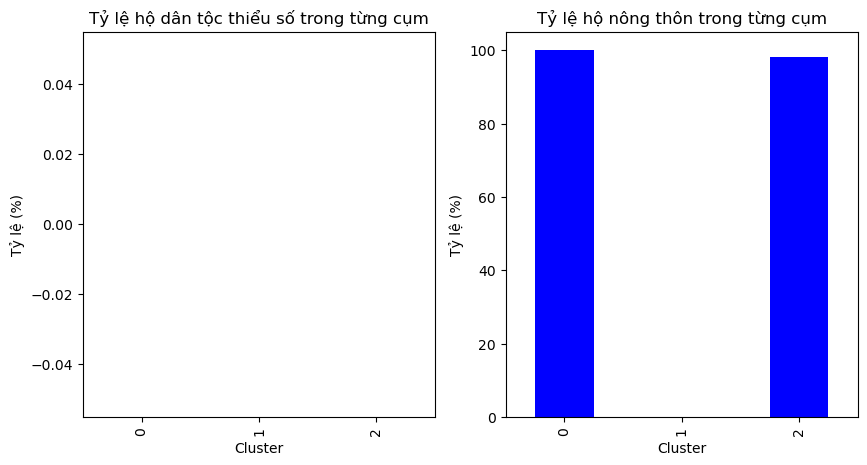

In [21]:
# Tính tỷ lệ hộ dân tộc thiểu số và hộ nông thôn trong từng cụm
ethnic_ratio = df.groupby("Cluster_PCA")["dantoc"].apply(lambda x: (x == 0).mean() * 100)
rural_ratio = df.groupby("Cluster_PCA")["ttnt"].apply(lambda x: (x == 0).mean() * 100)

print("Tỷ lệ hộ dân tộc thiểu số trong từng cụm (%):")
print(ethnic_ratio)

print("\nTỷ lệ hộ nông thôn trong từng cụm (%):")
print(rural_ratio)

# Vẽ biểu đồ
plt.figure(figsize=(10,5))

plt.subplot(1, 2, 1)
ethnic_ratio.plot(kind="bar", color="green")
plt.xlabel("Cluster")
plt.ylabel("Tỷ lệ (%)")
plt.title("Tỷ lệ hộ dân tộc thiểu số trong từng cụm")

plt.subplot(1, 2, 2)
rural_ratio.plot(kind="bar", color="blue")
plt.xlabel("Cluster")
plt.ylabel("Tỷ lệ (%)")
plt.title("Tỷ lệ hộ nông thôn trong từng cụm")

plt.show()

Đặc điểm hộ gia đình trong từng cụm:
              tsnguoi  dienticho
Cluster_PCA                     
0            3.896514  71.065968
1            3.831415  84.959153
2            4.605960  56.387417


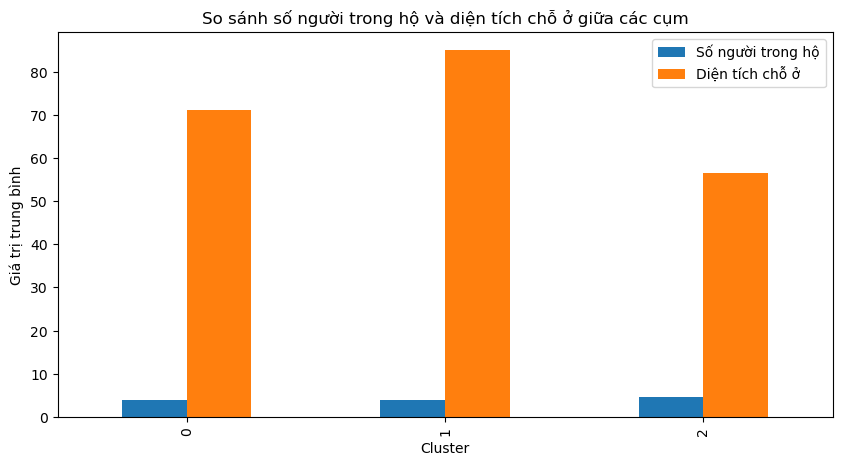

In [22]:
# Tính số người trung bình trong hộ và diện tích chỗ ở trong từng cụm
household_summary = df.groupby("Cluster_PCA")[['tsnguoi', 'dienticho']].mean()

print("Đặc điểm hộ gia đình trong từng cụm:")
print(household_summary)

# Vẽ biểu đồ so sánh đặc điểm hộ gia đình giữa các cụm
household_summary.plot(kind="bar", figsize=(10,5))
plt.xlabel("Cluster")
plt.ylabel("Giá trị trung bình")
plt.title("So sánh số người trong hộ và diện tích chỗ ở giữa các cụm")
plt.legend(["Số người trong hộ", "Diện tích chỗ ở"])
plt.show()

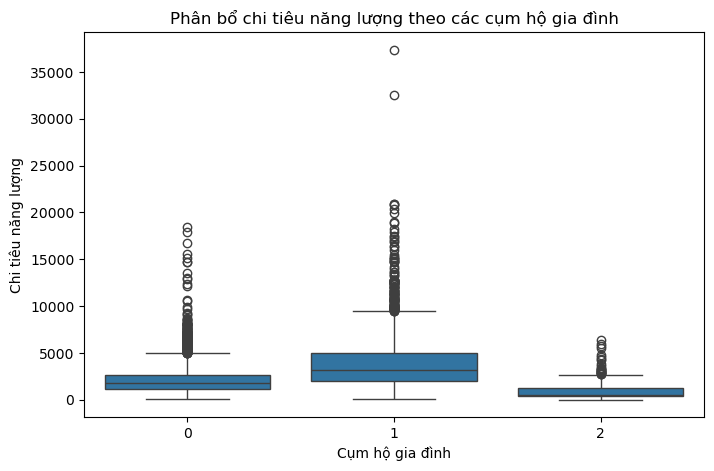

In [25]:
import seaborn as sns
plt.figure(figsize=(8, 5))
sns.boxplot(data=df, x='Cluster_PCA', y='chichonangluong')
plt.title("Phân bổ chi tiêu năng lượng theo các cụm hộ gia đình")
plt.xlabel("Cụm hộ gia đình")
plt.ylabel("Chi tiêu năng lượng")
plt.show()